<a href="https://colab.research.google.com/github/wongdongwook/Bilevel-Optimization/blob/main/Bilevel_Pricing%E2%80%93Power_Allocation_A_Stable_Advantage_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bilevel Optimization — Pricing–Power Allocation *(Stable Advantage Demo)*

**TL;DR**  
- Lower level: given prices $\boldsymbol{\pi}$, allocate powers $\mathbf{p}$ by **water-filling**. We set $P_{\max}$ large so the lower constraint is **inactive** (i.e., $\nu=0$).  
- Upper level: learn $\boldsymbol{\pi}$ so the **shaped sum** $\sum_{n=1}^{N}\mathrm{shape}_n\,p_n$ matches $P_{\text{target}}$ while maximizing **utility** $\sum_{n=1}^{N} w_n \log\!\big(1+g_n p_n\big)$.  
- Baselines: Constant price, Equal power, Proportional to $g_n$, Proportional to $w_n g_n$.  
- Expect **Bilevel** to yield **smaller mismatch** and **larger utility**, hence lower objective $F$.

---

## Problem Setup

- Subbands: $n=1,\dots,N$  
- Channel gains: $g_n>0$, weights: $w_n>0$, shaping weights: $\mathrm{shape}_n>0$ with $\tfrac{1}{N}\sum_{n=1}^{N}\mathrm{shape}_n\approx 1$  
- Upper variables: prices $\boldsymbol{\pi}=(\pi_1,\dots,\pi_N)$  
- Lower variables: powers $\mathbf{p}=(p_1,\dots,p_N)$ with $p_n\ge 0$  
- We choose $P_{\max}$ **large** so $\sum_{n=1}^{N} p_n\le P_{\max}$ is typically inactive and $\nu=0$.

---

## Lower Level (Water-Filling)

Given $\boldsymbol{\pi}$, solve
$$
\max_{\mathbf{p}\ge 0}\;
\sum_{n=1}^{N} w_n \log\!\big(1+g_n p_n\big)\;-\;\sum_{n=1}^{N}\pi_n p_n
\quad\text{s.t.}\quad
\sum_{n=1}^{N} p_n \le P_{\max}.
$$

KKT (active subbands) gives the marginal-utility condition
$$
\frac{w_n g_n}{\,1+g_n p_n\,} \;=\; \pi_n + \nu \, .
$$

Hence the water-filling solution
$$
p_n^{\star}(\boldsymbol{\pi},\nu)
\;=\;
\left[\;\frac{w_n}{\pi_n+\nu}\;-\;\frac{1}{g_n}\;\right]_+ \, .
$$

With $P_{\max}$ large (constraint inactive), $\nu=0$ and
$$
p_n^{\star}(\boldsymbol{\pi})
\;=\;
\left[\;\frac{w_n}{\pi_n}\;-\;\frac{1}{g_n}\;\right]_+ \, .
$$

---

## Upper Objective (Shaped Target + Utility + Price Regularization)

We minimize
$$
F(\boldsymbol{\pi})
\;=\;
\Big(\underbrace{\textstyle\sum_{n=1}^{N}\mathrm{shape}_n\,p_n^{\star}(\boldsymbol{\pi})
- P_{\text{target}}}_{\text{mismatch}}\Big)^{\!2}
\;-\;
\alpha\sum_{n=1}^{N} w_n \log\!\big(1+g_n p_n^{\star}(\boldsymbol{\pi})\big)
\;+\;
\lambda_{\pi}\,\|\boldsymbol{\pi}\|_2^2 \, .
$$

- First term: **shaped target** matching.  
- Second term: **utility** (weighted by $\alpha>0$).  
- Third term: **price $\ell_2$ regularization** (weight $\lambda_{\pi}>0$) for stability and to avoid dead-zones.

---

## Why Bilevel Beats Constant / Heuristics

1. **Marginal-utility equalization** for active bands:
   $$
   \frac{w_n g_n}{1+g_n p_n}=\pi_n+\nu \, .
   $$
   Per-band prices $\{\pi_n\}$ let bilevel push power to **high-return** bands and **shut off** poor bands ($p_n=0$), exploiting saturation of $\log(1+g p)$.

2. **Degrees of freedom:** Constant price has one degree of freedom; bilevel has $N$. Bilevel can match the **shape** target while improving **utility**.

3. **Heuristics miss saturation/sparsity:** Equal / proportional rules are linear and do not enforce the KKT condition, so they typically yield smaller $\sum w\log(1+g p)$.

---

## Baselines

- **Constant price** (scalar $\pi$): powers follow
$$
p_n^{(\text{const})}(\pi)
=
\left[\;\frac{w_n}{\pi}\;-\;\frac{1}{g_n}\;\right]_+ \, .
$$

- **Equal power:** $p_n=\tfrac{P_{\text{target}}}{N}$.  

- **Proportional to $g$:** $p_n\propto g_n$, scaled to $\sum_{n} p_n = P_{\text{target}}$.  

- **Proportional to $w\!\cdot\!g$:** $p_n\propto w_n g_n$, scaled to $\sum_{n} p_n = P_{\text{target}}$.

Often,
$$
F(\text{Bilevel}) \;<\; F(\text{Constant}) \;<\; F(\text{Proportional}) \;\lesssim\; F(\text{Equal}) \, ,
$$
because bilevel achieves **larger utility** at similar or smaller mismatch.

---

## Reading the Logs

A training line indicates
$$
F \downarrow,\qquad
\sum_{n=1}^{N}\mathrm{shape}_n p_n \approx P_{\text{target}},\qquad
\sum_{n=1}^{N} w_n\log(1+g_n p_n)\ \text{increasing},\qquad
\nu=0 \, .
$$

- $F$ decreasing $\Rightarrow$ improvement.  
- Shaped sum near $P_{\text{target}}$ $\Rightarrow$ small mismatch.  
- $\nu=0$ $\Rightarrow$ the lower budget is inactive; price updates directly reshape $\mathbf{p}$.

---

## Optional: Shape-Aware Constant Baseline

If you impose the shaped target with multiplier $\lambda$ while optimizing $\mathbf{p}$ directly, stationarity gives
$$
\frac{\partial}{\partial p_n}
\!\left[
-\alpha\sum_{k=1}^{N} w_k\log(1+g_k p_k)
+\lambda\!\left(\sum_{k=1}^{N}\mathrm{shape}_k p_k - P_{\text{target}}\right)
\right]=0
\;\;\Longrightarrow\;\;
\frac{\alpha\,w_n g_n}{\,1+g_n p_n\,}
=
\lambda\,\mathrm{shape}_n \, .
$$

This suggests a **shape-aware price** family $\pi_n \propto \mathrm{shape}_n$ as a stronger constant-type baseline; full bilevel (free $\pi_n$) still typically attains lower $F$.

---

## Practical Knobs

- Increase $\alpha$ (e.g., $0.35\text{–}0.45$) to emphasize utility.  
- Widen the shape spread (e.g., $\mathrm{shape}_n\in[0.7,1.3]$) to make targeting harder and highlight bilevel’s benefit.  
- Keep $\pi_{\max}$ modest (e.g., $2\text{–}3$) and set $\lambda_{\pi}\in[5\times 10^{-3},\,2\times 10^{-2}]$ for stable training.


[Iter   1] F=-4.8601 | shaped_sum=8.3761 (target=8.0) | util=17.7484 | nu=0.00e+00 | step=6.250e-02
[Iter  25] F=-4.9351 | shaped_sum=8.1937 (target=8.0) | util=17.6214 | nu=0.00e+00 | step=6.250e-02
[Iter  50] F=-4.9529 | shaped_sum=8.1386 (target=8.0) | util=17.5858 | nu=0.00e+00 | step=6.250e-02
[Iter  75] F=-4.9644 | shaped_sum=8.1840 (target=8.0) | util=17.6401 | nu=0.00e+00 | step=6.250e-02
[Iter 100] F=-4.9735 | shaped_sum=8.1552 (target=8.0) | util=17.6129 | nu=0.00e+00 | step=6.250e-02
[Iter 125] F=-4.9809 | shaped_sum=8.1795 (target=8.0) | util=17.6393 | nu=0.00e+00 | step=6.250e-02
[Iter 150] F=-4.9877 | shaped_sum=8.1447 (target=8.0) | util=17.6036 | nu=0.00e+00 | step=6.250e-02
[Iter 175] F=-4.9944 | shaped_sum=8.1767 (target=8.0) | util=17.6372 | nu=0.00e+00 | step=6.250e-02
[Iter 200] F=-4.9997 | shaped_sum=8.1492 (target=8.0) | util=17.6085 | nu=0.00e+00 | step=6.250e-02

=== Summary (lower F is better) ===
Method                                F      sum p   sum(shape*

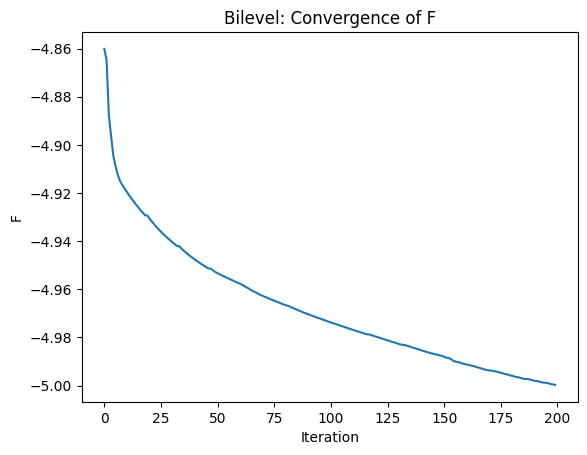

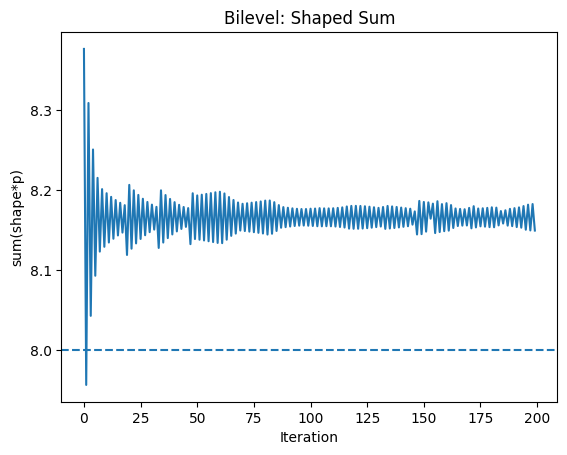

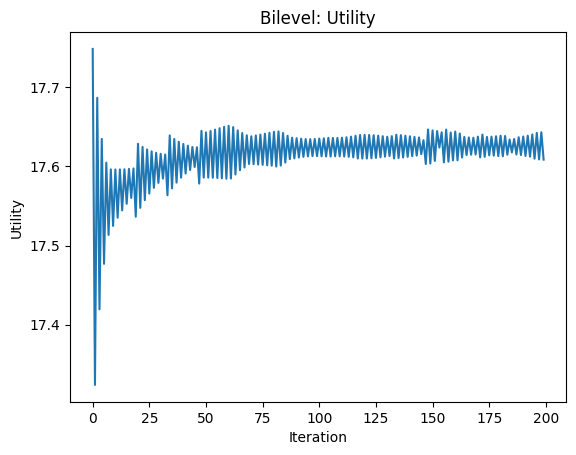

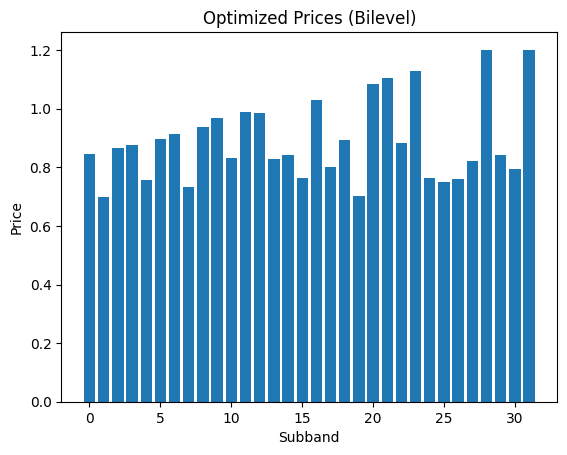

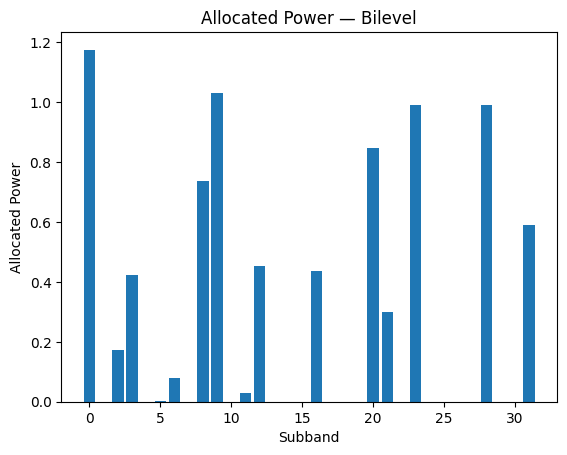

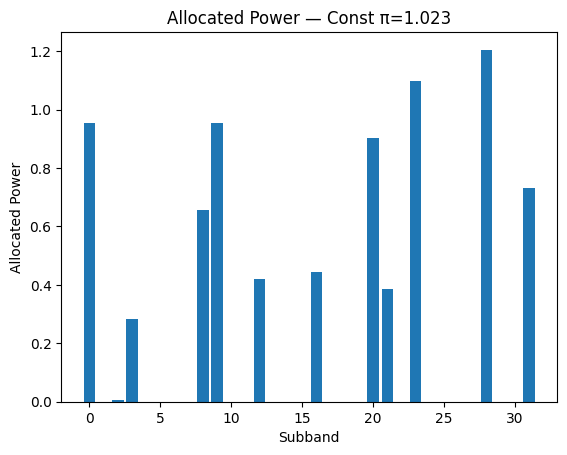

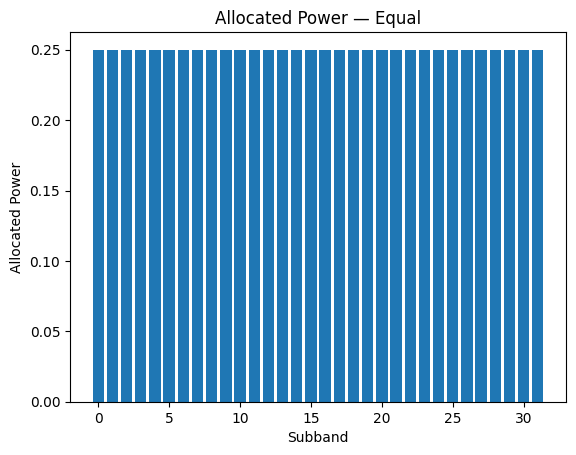

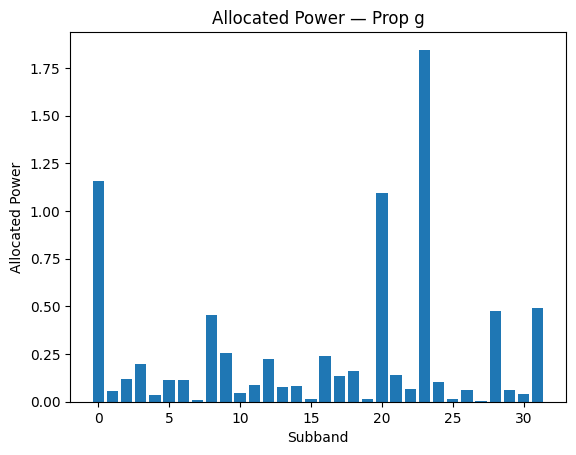

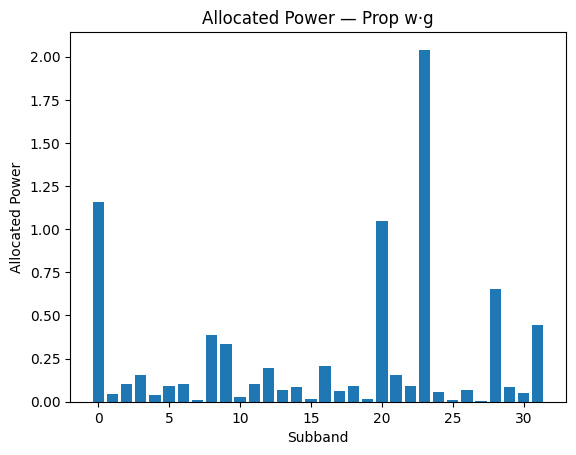

In [7]:
# Bilevel Optimization — (Pricing–Power Allocation) — Stable Advantage Demo
# Key fixes: large Pmax (inactive lower constraint), shaped target,
# L2 price regularizer (lambda_pi), and Armijo backtracking line search.

import numpy as np
import matplotlib.pyplot as plt
from dataclasses import dataclass

np.random.seed(7)

@dataclass
class ProblemConfig:
    N: int = 32
    Pmax: float = 100.0        # make lower constraint inactive (nu→0)
    P_target: float = 8.0      # shaped target value
    alpha: float = 0.3         # weight for utility
    pi_max: float = 3.0        # reasonable price cap (prevents blow-up)
    lambda_pi: float = 1e-2    # L2 regularizer on prices (keeps gradient alive)
    # channel/weight generation
    snr_db_mean: float = 10.0
    snr_db_spread: float = 6.0
    w_min: float = 0.5
    w_max: float = 1.5
    # shape profile (mean ≈ 1)
    shape_lo: float = 0.8
    shape_hi: float = 1.2

def generate_instance(cfg: ProblemConfig):
    snr_db = np.random.normal(cfg.snr_db_mean, cfg.snr_db_spread, size=cfg.N)
    g = 10 ** (snr_db / 10.0)
    g = g / np.median(g)  # normalize scale so median(g)≈1
    w = np.random.uniform(cfg.w_min, cfg.w_max, size=cfg.N)
    shape = np.linspace(cfg.shape_lo, cfg.shape_hi, cfg.N)
    shape = shape / shape.mean()
    return g, w, shape

# ---------- Lower-level: water-filling ----------
def water_filling(prices, g, w, Pmax, tol=1e-10, max_iter=200):
    prices = np.asarray(prices); g = np.asarray(g); w = np.asarray(w)
    def p_of_nu(nu):
        denom = np.maximum(prices + nu, 1e-14)
        p = w / denom - 1.0 / g
        return np.maximum(p, 0.0)
    p0 = p_of_nu(0.0)
    if np.sum(p0) <= Pmax + 1e-12:
        return p0, 0.0
    # (rare if Pmax is large) otherwise bisection
    nu_lo, nu_hi = 0.0, 1.0
    for _ in range(60):
        if np.sum(p_of_nu(nu_hi)) <= Pmax: break
        nu_hi *= 2.0
    for _ in range(max_iter):
        nu_mid = 0.5 * (nu_lo + nu_hi)
        s = np.sum(p_of_nu(nu_mid))
        if abs(s - Pmax) <= tol: return p_of_nu(nu_mid), nu_mid
        if s > Pmax: nu_lo = nu_mid
        else:        nu_hi = nu_mid
    nu_mid = 0.5*(nu_lo+nu_hi)
    return p_of_nu(nu_mid), nu_mid

# ---------- Upper objective (shaped target + L2 on prices) ----------
def F_given_p_shape(p, g, w, shape, cfg: ProblemConfig):
    p = np.asarray(p)
    utility = np.sum(w * np.log(1.0 + g * p))
    mis = np.sum(shape * p) - cfg.P_target
    F = mis**2 - cfg.alpha * utility
    return F, utility, mis

def upper_objective(prices, g, w, shape, cfg: ProblemConfig):
    p, nu = water_filling(prices, g, w, cfg.Pmax)
    F0, utility, mis = F_given_p_shape(p, g, w, shape, cfg)
    # L2 price penalty keeps prices finite & gives gradient even when p=0
    F = F0 + cfg.lambda_pi * np.sum(prices**2)
    return F, p, nu, utility, mis

# ---------- Numerical gradient ----------
def numerical_grad(fun, x, eps=1e-4):
    x = np.asarray(x, dtype=float)
    grad = np.zeros_like(x)
    for i in range(x.size):
        xi = x[i]
        x[i] = xi + eps; f_plus, *_ = fun(x)
        x[i] = xi - eps; f_minus, *_ = fun(x)
        x[i] = xi
        grad[i] = (f_plus - f_minus) / (2 * eps)
    return grad

# ---------- Armijo backtracking line search ----------
def armijo_backtracking(fun, x, grad, init_step=0.5, beta=0.5, c=1e-4):
    Fx, *_ = fun(x)
    g2 = np.dot(grad, grad)
    if g2 == 0.0: return 0.0
    step = init_step
    while step > 1e-8:
        x_new = np.clip(x - step * grad, 0.0, cfg.pi_max)
        F_new, *_ = fun(x_new)
        if F_new <= Fx - c * step * g2:
            return step
        step *= beta
    return 0.0

# ---------- Bilevel optimization over prices ----------
def optimize_prices(g, w, shape, cfg: ProblemConfig, iters=200, verbose=True):
    # start near 1.0 (close to good region), tiny noise to break symmetry
    prices = np.clip(1.0 + 0.05*np.random.randn(cfg.N), 0.0, cfg.pi_max)
    obj_hist, util_hist, shaped_hist = [], [], []
    fun = lambda pi: upper_objective(pi, g, w, shape, cfg)
    for t in range(1, iters+1):
        F, p, nu, util, mis = fun(prices)
        obj_hist.append(F); util_hist.append(util); shaped_hist.append(np.sum(shape*p))
        grad = numerical_grad(fun, prices, eps=1e-4)
        step = armijo_backtracking(fun, prices, grad, init_step=0.5, beta=0.5, c=1e-4)
        if step == 0.0:  # fallback small step
            step = 1e-2
        prices = np.clip(prices - step * grad, 0.0, cfg.pi_max)
        if verbose and (t % 25 == 0 or t == 1):
            print(f"[Iter {t:3d}] F={F:.4f} | shaped_sum={np.sum(shape*p):.4f} (target={cfg.P_target}) "
                  f"| util={util:.4f} | nu={nu:.2e} | step={step:.3e}")
    F, p, nu, util, mis = fun(prices)
    return prices, p, nu, F, util, mis, np.array(obj_hist), np.array(util_hist), np.array(shaped_hist)

# ---------- Baselines ----------
def baseline_constant_price(g, w, shape, cfg: ProblemConfig, grid=400):
    pis = np.linspace(0.0, cfg.pi_max, grid)
    best = None; best_pi = None; best_tuple = None
    for pi in pis:
        prices = np.full(cfg.N, pi)
        F, p, nu, util, mis = upper_objective(prices, g, w, shape, cfg)
        if (best is None) or (F < best):
            best = F; best_pi = pi; best_tuple = (prices, p, nu, F, util, mis)
    return best_pi, best_tuple

def baseline_equal_power(g, w, shape, cfg: ProblemConfig):
    p = np.full(cfg.N, cfg.P_target / cfg.N)
    return F_given_p_shape(p, g, w, shape, cfg) + (p,)

def baseline_proportional_g(g, w, shape, cfg: ProblemConfig):
    weights = np.maximum(g, 1e-12)
    p = cfg.P_target * weights / np.sum(weights)
    return F_given_p_shape(p, g, w, shape, cfg) + (p,)

def baseline_proportional_wg(g, w, shape, cfg: ProblemConfig):
    weights = np.maximum(w * g, 1e-12)
    p = cfg.P_target * weights / np.sum(weights)
    return F_given_p_shape(p, g, w, shape, cfg) + (p,)

# ---------- Run ----------
if __name__ == "__main__":
    cfg = ProblemConfig()
    g, w, shape = generate_instance(cfg)

    # Bilevel
    prices_opt, p_bi, nu_opt, F_bi, util_bi, mis_bi, obj_hist, util_hist, shaped_hist = \
        optimize_prices(g, w, shape, cfg, iters=200, verbose=True)

    # Baselines
    pi_const, (prices_c, p_cp, nu_c, F_cp, util_cp, mis_cp) = baseline_constant_price(g, w, shape, cfg, grid=400)
    F_eq, util_eq, mis_eq, p_eq   = baseline_equal_power(g, w, shape, cfg)
    F_pg, util_pg, mis_pg, p_pg   = baseline_proportional_g(g, w, shape, cfg)
    F_pwg, util_pwg, mis_pwg, p_pwg = baseline_proportional_wg(g, w, shape, cfg)

    def row(name, F, p, util, mis, mp=np.nan, medp=np.nan):
        return (name, F, np.sum(p), np.sum(shape*p), mis, util, mp, medp)

    rows = [
        row("Bilevel (optimized prices)", F_bi, p_bi, util_bi, mis_bi, np.mean(prices_opt), np.median(prices_opt)),
        row(f"Constant price (pi={pi_const:.3f})", F_cp, p_cp, util_cp, mis_cp, np.mean(prices_c), np.median(prices_c)),
        row("Equal power", F_eq, p_eq, util_eq, mis_eq),
        row("Proportional g", F_pg, p_pg, util_pg, mis_pg),
        row("Proportional w·g", F_pwg, p_pwg, util_pwg, mis_pwg),
    ]

    print("\n=== Summary (lower F is better) ===")
    print("{:<28s}  {:>9s}  {:>9s}  {:>13s}  {:>9s}  {:>9s}  {:>9s}  {:>9s}".format(
        "Method", "F", "sum p", "sum(shape*p)", "mismatch", "utility", "mean π", "median π"
    ))
    for name, F, sump, shaped_sum, mis, util, mp, medp in rows:
        print("{:<28s}  {:>9.4f}  {:>9.4f}  {:>13.4f}  {:>9.4f}  {:>9.4f}  {:>9}".format(
            name, F, sump, shaped_sum, mis, util, "-" if np.isnan(mp) else f"{mp:.3f}"
        ), end="")
        print("  {:>9}".format("-" if np.isnan(medp) else f"{medp:.3f}"))

    # Plots
    plt.figure(); plt.plot(obj_hist); plt.xlabel("Iteration"); plt.ylabel("F"); plt.title("Bilevel: Convergence of F"); plt.show()
    plt.figure(); plt.plot(shaped_hist); plt.axhline(cfg.P_target, linestyle="--"); plt.xlabel("Iteration"); plt.ylabel("sum(shape*p)"); plt.title("Bilevel: Shaped Sum"); plt.show()
    plt.figure(); plt.plot(util_hist); plt.xlabel("Iteration"); plt.ylabel("Utility"); plt.title("Bilevel: Utility"); plt.show()

    plt.figure(); plt.bar(np.arange(cfg.N), prices_opt); plt.xlabel("Subband"); plt.ylabel("Price"); plt.title("Optimized Prices (Bilevel)"); plt.show()

    methods = [("Bilevel", p_bi), (f"Const π={pi_const:.3f}", p_cp), ("Equal", p_eq), ("Prop g", p_pg), ("Prop w·g", p_pwg)]
    for name, p in methods:
        plt.figure(); plt.bar(np.arange(cfg.N), p); plt.xlabel("Subband"); plt.ylabel("Allocated Power"); plt.title(f"Allocated Power — {name}"); plt.show()
